In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

width = 5
height = width / 1.618

matplotlib.rcParams.update({
    'font.size': 12,
    'figure.figsize': (width, height),
    'figure.facecolor': 'white',
    'savefig.dpi': 72,
    'figure.subplot.bottom': 0.125,
    'figure.edgecolor': 'white',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})


In [2]:
y = [2778, 5660, 11076, 21854, 42137, 77120]
x = [128*(2**i) for i in range(len(y))]
y_linear = [y[0]*(2**i) for i in range(len(y))]
x_log2, y_log2 = 4_096, 82127
y_base = [1644, 3212, 6575, 12796, 24893, 49182]
y_base_linear = [y_base[0]*(2**i) for i in range(len(y))]

In [3]:
np.mean([x1/x2 for x1, x2 in zip(y, y_base)])

1.6841902340220642

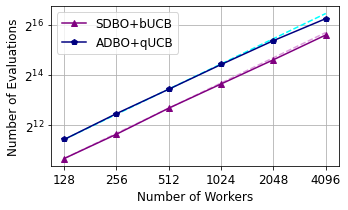

In [4]:
@ticker.FuncFormatter
def worker_formatter(x, pos):
    x = str(int(x))
    return x

plt.figure()
plt.plot(x, y_base_linear, color="plum", linestyle="--")
plt.plot(x, y_base, marker="^", color="purple", label="SDBO+bUCB")
plt.plot(x, y_linear, color="cyan", linestyle="--")
plt.plot(x, y, marker="p", color="navy", label="ADBO+qUCB")
# plt.plot([x_log2], [y_log2], marker="*", color="cyan")
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.ylabel("Number of Evaluations")
plt.xlabel("Number of Workers")
ax = plt.gca()
ax.xaxis.set_major_formatter(worker_formatter)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("scaling-distributed-qucb.pdf")
plt.show()

In [5]:
y = [0.876, 0.872, 0.865, 0.851, 0.819, 0.749]
x = [128*(2**i) for i in range(len(y))]
y_linear = [y[0]*(2**i) for i in range(len(y))]
y_base = [0.509, 0.499, 0.509, 0.496, 0.482, 0.478]

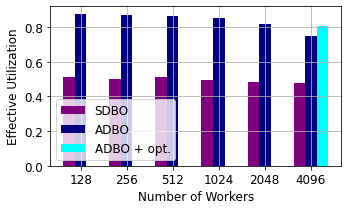

In [6]:
N = 6
ind = np.arange(N) 
width = 0.25
  
xvals = y_base
bar1 = plt.bar(ind, xvals, width, color = 'purple')
  
yvals = y
bar2 = plt.bar(ind+width, yvals, width, color='navy')
  
zvals = [0,0,0,0,0,0.803]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'cyan')
  
plt.xlabel("Number of Workers")
plt.ylabel("Effective Utilization")
# plt.title("Players Score")
  
plt.xticks(ind+width,x)
plt.legend( (bar1, bar2, bar3), ('SDBO', 'ADBO', 'ADBO + opt.'), loc="lower left")
plt.grid()
plt.tight_layout()
plt.savefig("scaling-distributed-qucb-utilization.pdf")
plt.show()

In [7]:
y = [0.876, 0.872, 0.865, 0.851, 0.819, 0.749]
x = [128*(2**i) for i in range(len(y))]
y_linear = [y[0]*(2**i) for i in range(len(y))]
y_base = [0.509, 0.499, 0.509, 0.496, 0.482, 0.478]

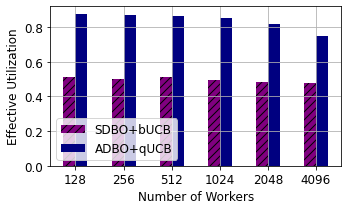

In [8]:
N = 6
ind = np.arange(N) 
width = 0.25
  
xvals = y_base
bar1 = plt.bar(ind, xvals, width, color = 'purple', hatch="///")
  
yvals = y
bar2 = plt.bar(ind+width, yvals, width, color='navy')
  
plt.xlabel("Number of Workers")
plt.ylabel("Effective Utilization")
# plt.title("Players Score")
  
plt.xticks(ind+width/2,x)
plt.legend( (bar1, bar2), ('SDBO+bUCB', 'ADBO+qUCB'), loc="lower left")
plt.grid()
plt.tight_layout()
plt.savefig("scaling-distributed-qucb-utilization.pdf")
plt.show()

In [15]:
y_all = [0.748, 0.659, 0.486, 0.296, 0.147]
x = [5, 10, 30, 50, 100]
y_frqs = [0.803, 0.754, 0.604, 0.336, 0.230]

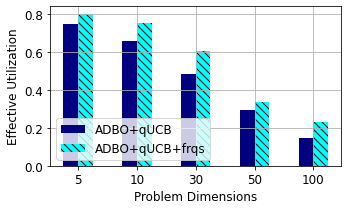

In [18]:
N = 5
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, y_all, width, color = 'navy')  

bar2 = plt.bar(ind+width, y_frqs, width, color='cyan', hatch="\\\\\\")
  
plt.xlabel("Problem Dimensions")
plt.ylabel("Effective Utilization")
  
plt.xticks(ind+width/2,x)
plt.legend( (bar1, bar2), ('ADBO+qUCB', 'ADBO+qUCB+frqs'), loc="lower left")
plt.grid()
plt.tight_layout()
plt.savefig("scaling-dimensions-sdbo-utilization.pdf")
plt.show()